# Explore here

It's recommended to use this notebook for exploration purposes.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
url = "https://companies-market-cap-copy.vercel.app/index.html"

response = requests.get(url)

In [3]:
soup = BeautifulSoup(response.text, 'html.parser')

In [5]:
table =  soup.find_all('table', {'class': 'table'}) #acceso a la tabla
rows = soup.find_all('tr')[1:] #coger cada fila expecto la del nombre de las columnas

years = []
revenues = []
changes = []

for row in rows:
    cells = row.find_all('td')

    if len(cells) == 3:
        year = cells[0].text.strip()
        revenue = cells[1].text.strip()
        change = cells[2].text.strip()

        years.append(year)
        revenues.append(revenue)
        changes.append(change)

In [9]:
import pandas as pd

df = pd.DataFrame(list(zip(years, revenues, changes)), columns=['Year', 'Revenue', 'Change'])
df

,Year,Revenue,Change
0,2024,$97.15 B,0.39%
1,2023,$96.77 B,18.8%
2,2022,$81.46 B,51.35%
3,2021,$53.82 B,70.67%
4,2020,$31.53 B,28.31%
5,2019,$24.57 B,14.52%
6,2018,$21.46 B,82.51%
7,2017,$11.75 B,67.98%
8,2016,$7.00 B,73.01%
9,2015,$4.04 B,26.5%


Vamos a limpiar un poco los datos de los ingresos para representarlos mejor

In [12]:
def convertir_ingresos(valor):
    if "B" in valor:
        editar_valor = float(valor.replace("B", "").replace("$", "").replace(",", ""))
        return editar_valor


df["Revenue"] = df["Revenue"].apply(convertir_ingresos)

df["Revenue"]

0     97.15
1     96.77
2     81.46
3     53.82
4     31.53
5     24.57
6     21.46
7     11.75
8      7.00
9      4.04
10     3.19
11     2.01
12     0.41
13     0.20
14     0.11
15     0.11
Name: Revenue, dtype: float64

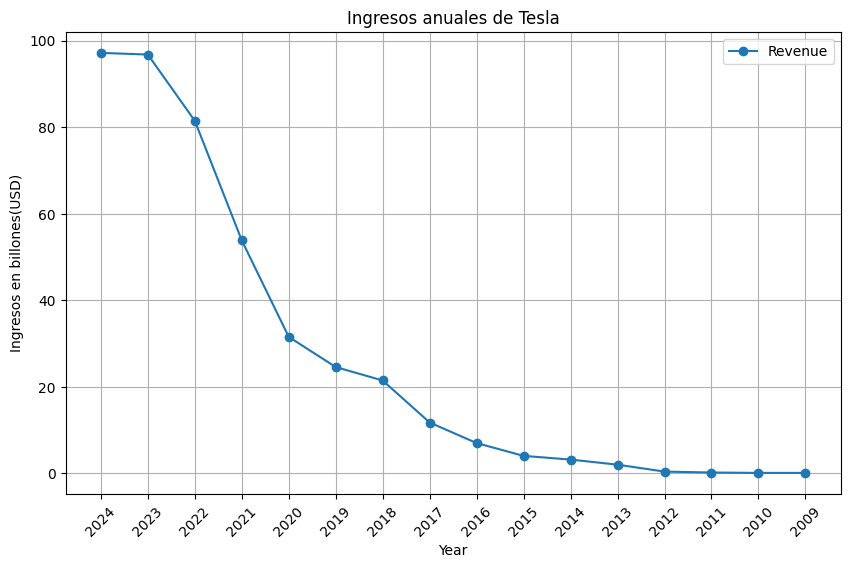

In [13]:
# Graficar los datos
plt.figure(figsize=(10, 6))
plt.plot(df["Year"], df["Revenue"], marker='o', label="Revenue")
plt.title("Ingresos anuales de Tesla")
plt.xlabel("Year")
plt.ylabel("Ingresos en billones(USD)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Guardar y mostrar el gráfico
plt.savefig("revenue_plot.png")
plt.show()

Si hubiesemos invertido en Tesla hace diez años habríamos multiplicado nuestro dinero casi 100 veces